## 1° Problema de Negócio

Uma vez que como iniciante em machine learning seria uma grande oportunidade para tentar algumas técnicas para prever o resultado da Previsão de Nível de Adaptabilidade dos Alunos na Educação Online usando abordagens de machine learning

## Conteúdo
O recurso de destino é
Nível de adaptabilidade



## Os conjuntos de recursos são:
Gênero,
Idade,
Nível de Escolaridade,
Tipo de instituição,
Estudante de TI,
Localização na cidade,
Derramamento de carga,
Condição Financeira,
Tipo de Internet,
Tipo de rede,
Duração da classe,
Auto LMS,
Dispositivo




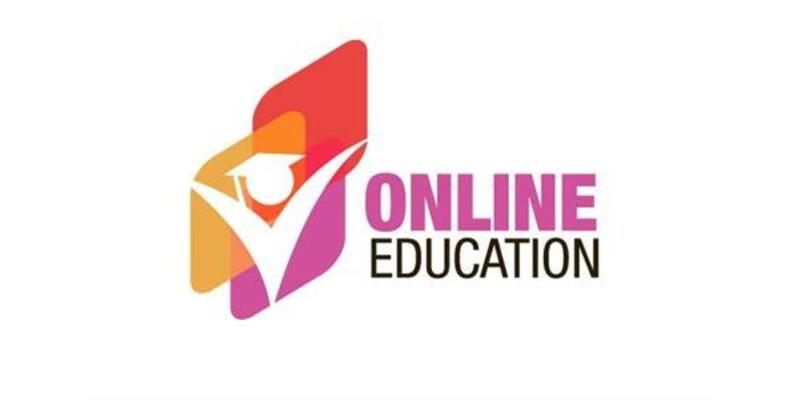

In [1]:
# Importação das Bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

## 2° Análise Exploratória dos Dados


In [16]:
#Importação e Visualização dos Dados
df = pd.read_csv ("students_adaptability_level_online_education.csv")
print(df.info())
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
# #Relatorio panoramico
from dataprep.eda import create_report
create_report(df)

In [4]:
# Verifique se há valores perdidos
df.isna().sum()

Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level    0
dtype: int64

In [5]:
df.nunique()

Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level    256
dtype: int64

In [6]:
# verificar variáveis
df.columns

Index(['Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level'], dtype='object')

## 3° Pré-Processamento dos Dados

In [17]:
#Fazendo alterações de nome nos dados
df.rename(columns = {'Adaptivity Level':'Adaptabilidade'},inplace = True)
df.rename(columns = {'Age': 'Faixa etaria'},inplace = True)

df.replace("Boy","Menino",inplace=True)
df.replace("Girl","Menina",inplace=True)
df.replace("Mid","Middle Class",inplace=True)
df.replace("Poor","Lower Class",inplace=True)
df.replace("Rich","Upper Class",inplace=True)
df

,Gender,Faixa etaria,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptabilidade
0,Menino,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate
1,Menina,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Menina,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate
3,Menina,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Menina,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Menina,16-20,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low
1201,Menina,16-20,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate
1202,Menino,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Menina,16-20,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low


In [18]:
#uma vez que a idade vem como uma faixa e é uma sequência, python vai classificar automaticamente por ordem alfabética
#ser capaz de classificar numericamente, dividir o intervalo e usar o limite inferior 
col1 = df["Faixa etaria"].apply(lambda x: x.split("-")[0])
df1 = df.join(col1.to_frame(name="Idade limite mais baixa"))
df1.drop(['Faixa etaria'], axis = 1, inplace = True)
df1

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptabilidade,Idade limite mais baixa
0,Menino,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate,21
1,Menina,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate,21
2,Menina,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate,16
3,Menina,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate,11
4,Menina,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Menina,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16
1201,Menina,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate,16
1202,Menino,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate,11
1203,Menina,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16


In [20]:
#transformando as variaveis em int
for variaveis in ['Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptabilidade', 'Idade limite mais baixa']:
    df1[variaveis] = LabelEncoder().fit_transform(df1[variaveis])

### 4° **Padronizando as Variáveis de Entrada**


In [21]:
# O Algoritmo requer dados na mesma escala. Vamos escalonar os dados
scaler = OrdinalEncoder()
names = df1.columns
d = scaler.fit_transform(df1)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptabilidade,Idade limite mais baixa
0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0
1,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,1.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0


In [ ]:
train = scaled_df.drop(['Adaptabilidade','Gender',],axis = 1)
test = scaled_df['Adaptabilidade']

In [ ]:
# Separando em dados de treino e Teste
X_train, X_test, y_train, y_test=train_test_split(train,test ,test_size=0.33,random_state=42)

### 5° **Criando a Máquina Preditiva com Naive Bayes**


In [ ]:
# Modelagem - Treinando o Modelo classificador 
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
#testando 4 modelos para encontrar o melhor
models = [RandomForestClassifier(), GaussianNB(), SVC(), LogisticRegression()]


for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)

    print(f'model: {str(a)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

Agora, para responder nossa pergunta finalmente, tendo feito toda a confirmação que precisamos de que nosso modelo é bom o suficiente para prever a resposta, vamos fazer a pergunta.

In [ ]:
#Usando o melhor modelo para plotar as 5 características mais importantes
FinalM= RandomForestClassifier()
FinalM.fit(X_train, y_train)
y_pred = FinalM.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

In [ ]:
#Plot características mais importantes
feature_importances=FinalM.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Importância variável':feature_importances})

feature_importances_df.sort_values('Importância variável',ascending=False)

feat_importances = pd.Series(FinalM.feature_importances_, index=train.columns)

feat_importances.nlargest(5).plot(kind='barh')
plt.title("5 características mais importantes")

![](https://miro.medium.com/fit/c/184/184/0*CszCU2p5Ml6WbnH3.gif)

In [ ]:
#Display recurso de destino adaptabilidade
cm = confusion_matrix(nb.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Alto","Baixo","Moderado"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

O termo de adaptabilidade é uma combinação de satisfação geral dos alunos e o quanto eles se adaptaram à educação online. Não, a variável não se baseia no desempenho. É uma seleção direta de alunos.

## Exemplo! Interpretação matriz de confusão

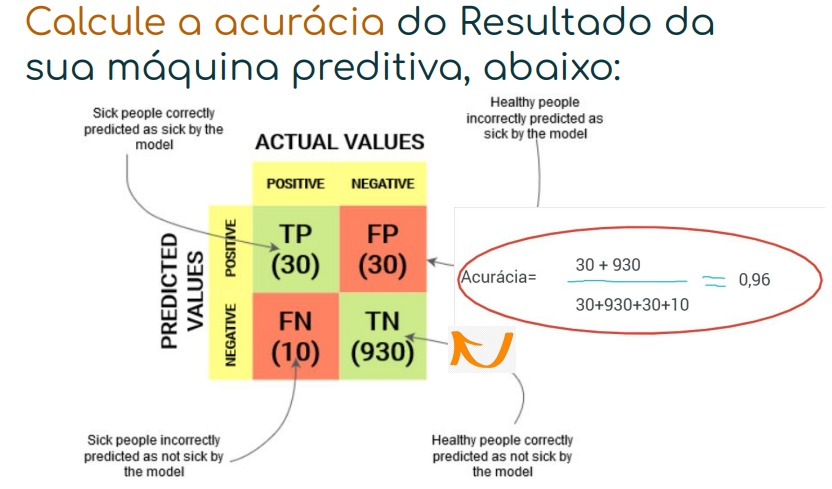

![](https://netodays.files.wordpress.com/2008/03/distnormal1.gif)





![](https://img.freepik.com/free-photo/portrait-excited-young-woman-celebrating-success_171337-31870.jpg?size=626&ext=jpg)

# Conclusão
Naive Bayes é o algoritmo mais simples e poderoso. Apesar dos grandes avanços recentes no aprendizado de máquina, ele mostrou sua utilidade. Ele tem sido usado em aplicativos que variam de analítica de texto a sistemas de recomendação.
Este classificador é empregado quando os valores do preditor são contínuos e devem seguir uma distribuição gaussiana.




Fonte:
https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education



## Fim!!